Dataframe shape: (4000, 8)
Features shape: (4000, 7)
Labels shape: (4000,)
Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6978 - loss: 0.5416 - val_accuracy: 0.8258 - val_loss: 0.5203 - learning_rate: 0.0100
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8635 - loss: 0.3090 - val_accuracy: 0.8875 - val_loss: 0.3753 - learning_rate: 0.0100
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8742 - loss: 0.2760 - val_accuracy: 0.8958 - val_loss: 0.2881 - learning_rate: 0.0100
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8867 - loss: 0.2553 - val_accuracy: 0.9092 - val_loss: 0.2547 - learning_rate: 0.0100
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8959 - loss: 0.2497 - val_accuracy: 0.9117 - val_loss: 0.2305 - learning_rate: 0.0100
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9046 - loss: 0.2326 - val_accuracy: 0.9158 - val_loss: 0.2256 - learning_rate: 0.0100
Epoch 7/100
88/88 ━

<Figure size 800x600 with 0 Axes>

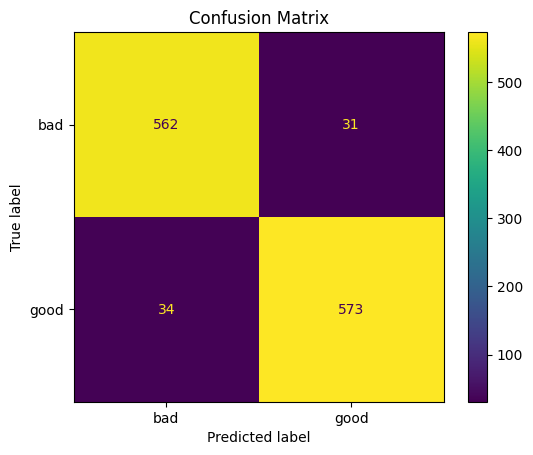

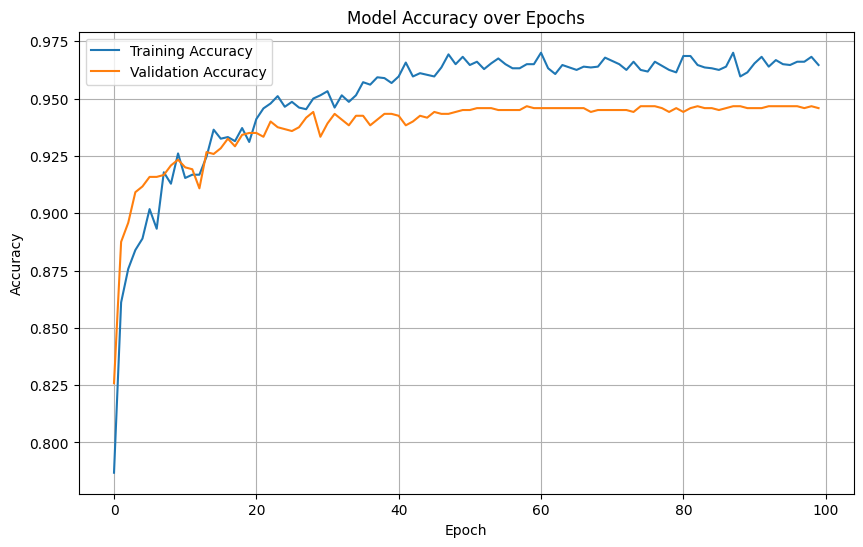

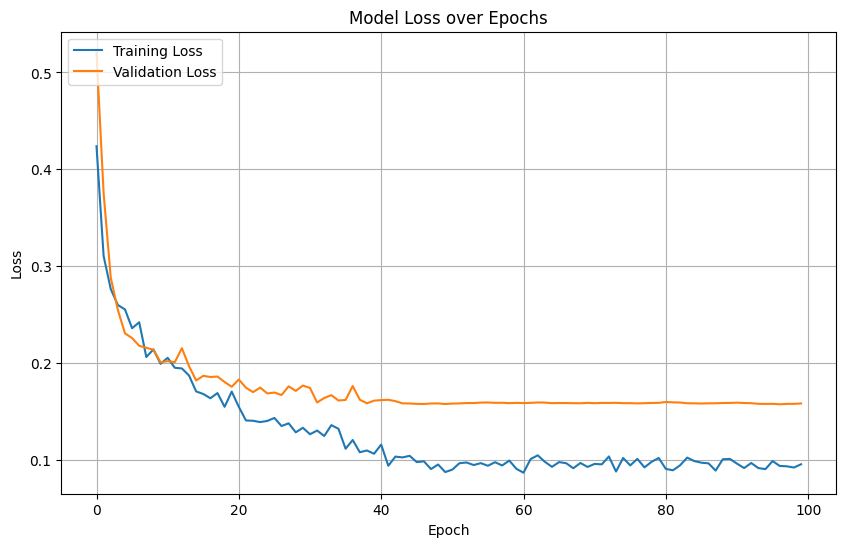

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt

# Read the dataset
file_path = '/kaggle/input/apple-dataset1/apple_quality.csv'
df = pd.read_csv(file_path)

# Check the shape of the dataframe to identify if there's an extra column
print(f"Dataframe shape: {df.shape}")

# Separate features and labels
X = df.drop('Quality', axis=1)
y = df['Quality']

# Verify the number of features
print(f"Features shape: {X.shape}")
print(f"Labels shape: {y.shape}")

# Encode labels (good -> 1, bad -> 0)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the neural network model
model = Sequential()
model.add(tf.keras.Input(shape=(X.shape[1],)))  # Define input shape based on number of features
model.add(Dense(128, activation='relu'))  # Increase the number of neurons
model.add(BatchNormalization())  # Batch normalization

model.add(Dense(240, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(120, activation='relu'))
model.add(BatchNormalization())


model.add(Dense(1, activation='sigmoid'))  # Output layer with 1 neuron

# Compile the model with Adam optimizer
model.compile(optimizer=SGD(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Learning rate scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[reduce_lr])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')

# Predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_).plot(values_format='d')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

# Plot training & validation accuracy values
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


Dataframe shape: (4000, 8)
Features shape: (4000, 7)
Labels shape: (4000,)
Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7657 - loss: 0.5481 - val_accuracy: 0.8642 - val_loss: 0.3235 - learning_rate: 0.0100
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8460 - loss: 0.3444 - val_accuracy: 0.9033 - val_loss: 0.2587 - learning_rate: 0.0100
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9028 - loss: 0.2395 - val_accuracy: 0.9192 - val_loss: 0.2180 - learning_rate: 0.0100
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9050 - loss: 0.2235 - val_accuracy: 0.9208 - val_loss: 0.2367 - learning_rate: 0.0100
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9070 - loss: 0.2216 - val_accuracy: 0.9342 - val_loss: 0.1806 - learning_rate: 0.0100
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9205 - loss: 0.2031 - val_accuracy: 0.9267 - val_loss: 0.1947 - learning_rate: 0.0100
Epoch 7/100
88/88 ━

<Figure size 800x600 with 0 Axes>

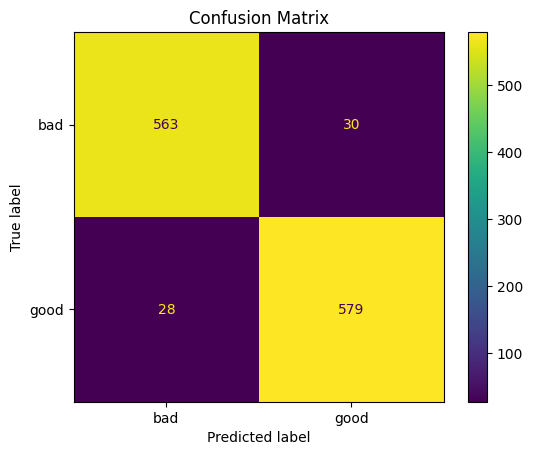

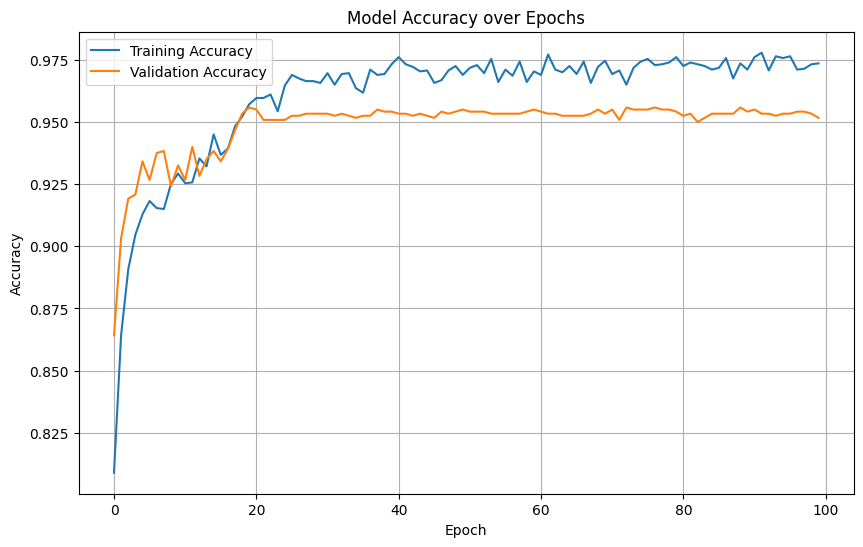

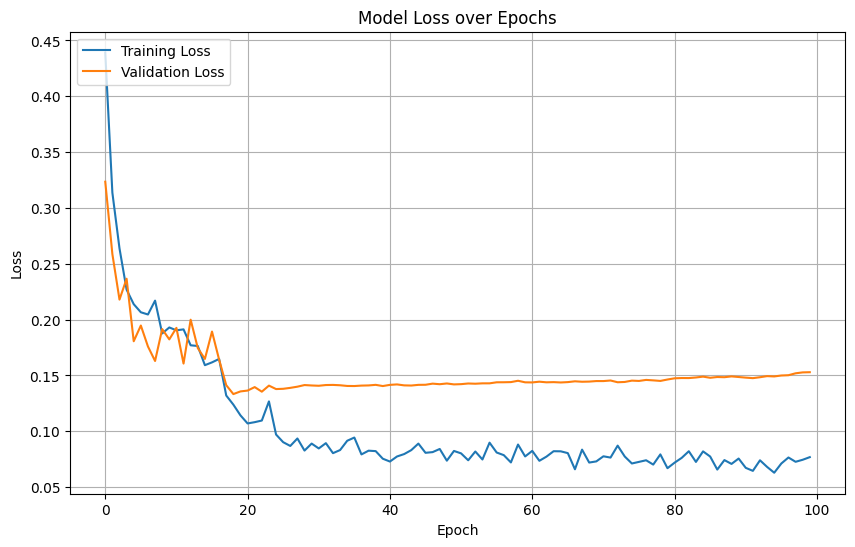

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt

# Read the dataset
file_path = '/kaggle/input/apple-dataset1/apple_quality.csv'
df = pd.read_csv(file_path)

# Check the shape of the dataframe to identify if there's an extra column
print(f"Dataframe shape: {df.shape}")

# Separate features and labels
X = df.drop('Quality', axis=1)
y = df['Quality']

# Verify the number of features
print(f"Features shape: {X.shape}")
print(f"Labels shape: {y.shape}")

# Encode labels (good -> 1, bad -> 0)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the neural network model
model = Sequential()
model.add(tf.keras.Input(shape=(X.shape[1],)))  # Define input shape based on number of features
model.add(Dense(128, activation='relu'))  # Increase the number of neurons
model.add(BatchNormalization())  # Batch normalization

model.add(Dense(240, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(120, activation='relu'))
model.add(BatchNormalization())


model.add(Dense(1, activation='sigmoid'))  # Output layer with 1 neuron

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Learning rate scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[reduce_lr])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')

# Predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_).plot(values_format='d')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

# Plot training & validation accuracy values
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()
